## Table Of Contents

* [Exploratory Data Analysis](#eda)
    * [Target Feature](#targetfeature)
    * [Numerical Features](#numericalfeatures)
    * [Categorical Features](#categoricalfeatures)

### Exploratory Data Analysis <a class="eda" id="dw"></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('data\DataWranglingBankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Target Feature <a class="anchor" id="targetfeature"></a>

In [41]:
round(df['Attrition_Flag'].value_counts()/df.shape[0]*100,2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

##### A very small % of data is churned. So it is imbalanced data.

In [42]:
dfo = df.select_dtypes(include=['object'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Attrition_Flag,2
1,Gender,2
2,Education_Level,7
3,Marital_Status,4
4,Income_Category,6
5,Card_Category,4


##### There are 6 categorical features in the data

#### Numerical Features <a class="anchor" id="numericalfeatures"></a>

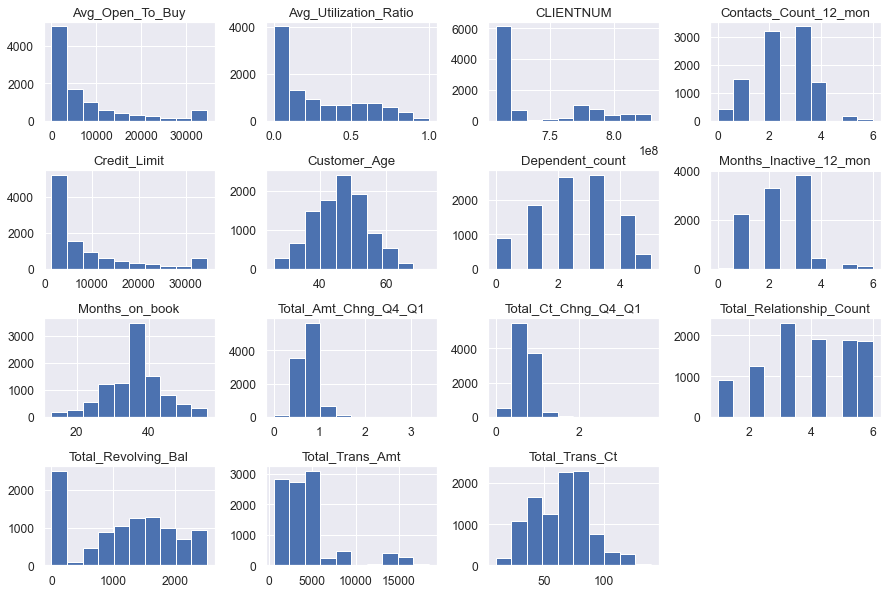

In [43]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

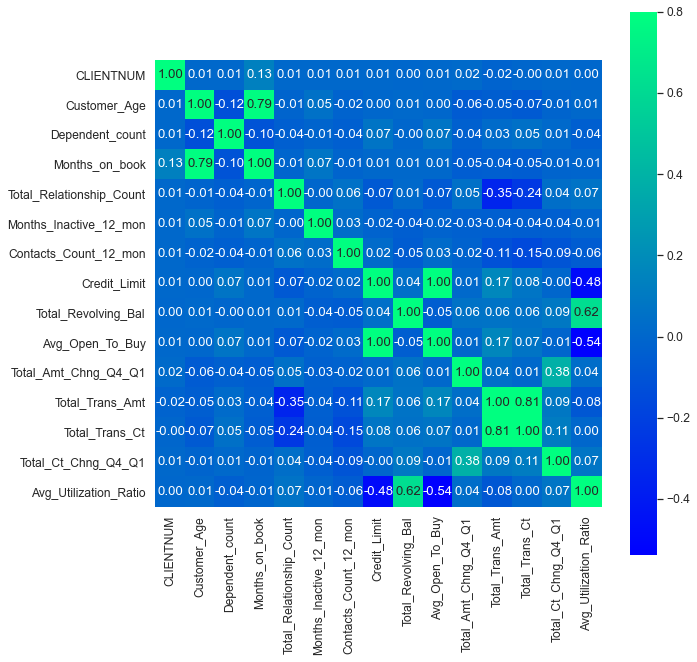

In [44]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt='.2f',  cmap='winter')
plt.show()

##### We see that Avg_open_to_buy and credit limit are highly correlated. 
##### Next comes customer age and Months on book.
##### Total_trans_count and Total_trans_amt are also highly correlated. 
##### Avg_utilization_ratio and Total_Revolving_bal also seem to be correlated, but we will verify with the numbers.

In [45]:
df_attrited = df[df['Attrition_Flag']=='Attrited Customer']
df_existing = df[df['Attrition_Flag']=='Existing Customer']

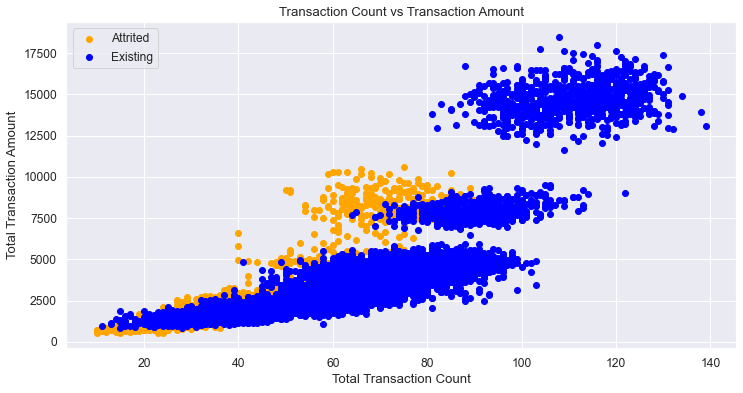

In [46]:
plt.figure(figsize=(12,6))
plt.scatter(df_attrited.Total_Trans_Ct, df_attrited.Total_Trans_Amt, marker = 'o', color = 'orange', label = 'Attrited')
plt.scatter(df_existing.Total_Trans_Ct, df_existing.Total_Trans_Amt, marker = 'o', color = 'blue', label = 'Existing')
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount')
plt.legend(loc='upper left')
plt.title('Transaction Count vs Transaction Amount')
plt.show()


##### Customers who have left have fewer transaction counts than existing customers.

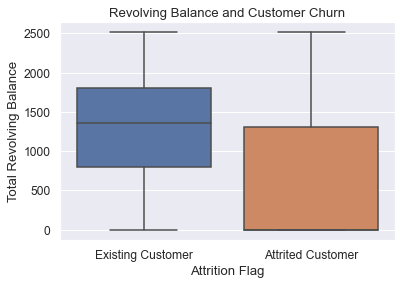

In [47]:
sns.boxplot(df['Attrition_Flag'], df['Total_Revolving_Bal'] )
plt.title('Revolving Balance and Customer Churn')
plt.ylabel('Total Revolving Balance')
plt.xlabel('Attrition Flag')
plt.show()

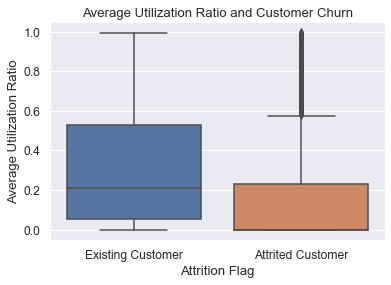

In [48]:
sns.boxplot(df['Attrition_Flag'], df['Avg_Utilization_Ratio'] )
plt.title('Average Utilization Ratio and Customer Churn')
plt.ylabel('Average Utilization Ratio')
plt.xlabel('Attrition Flag')
plt.show()

##### Lower revolving balance and Average utilization ratio gets customers leaving.

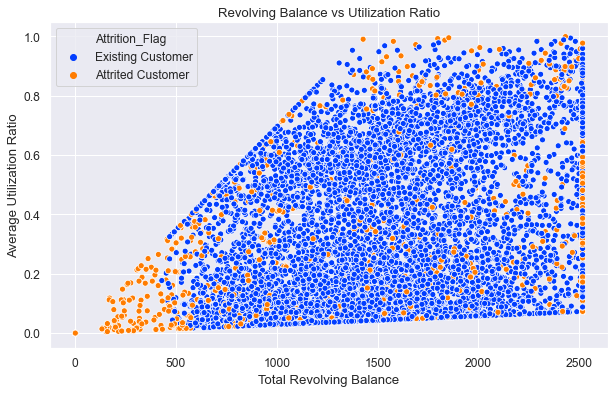

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette="bright")
plt.ylabel('Average Utilization Ratio')
plt.xlabel('Total Revolving Balance')
plt.title('Revolving Balance vs Utilization Ratio')
plt.show()

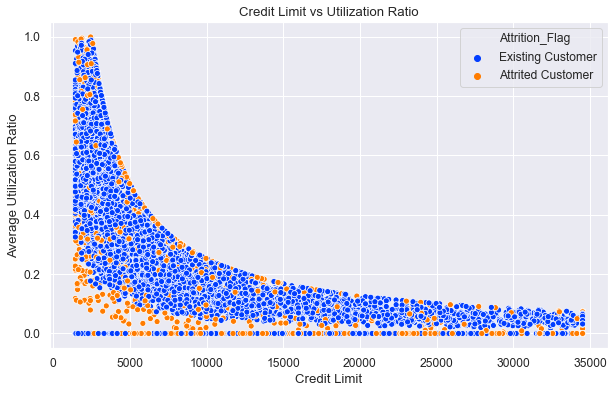

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette="bright")
plt.ylabel('Average Utilization Ratio')
plt.xlabel('Credit Limit')
plt.title('Credit Limit vs Utilization Ratio')
plt.show()

##### Both Total_Revolving_Bal and Avg_Utilization_Ratio are similar, we can remove one of them, Avg_Utilization_Ratio later.

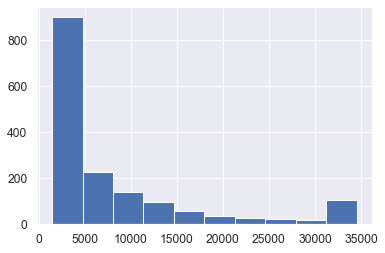

In [51]:
df_attrited['Credit_Limit'].hist()

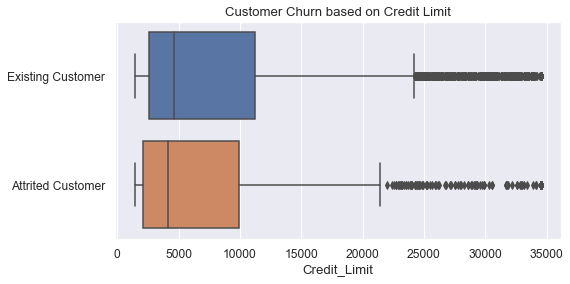

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Credit_Limit', y='Attrition_Flag', data=df)
plt.title('Customer Churn based on Credit Limit')
plt.ylabel('')
plt.show()

#### Inferential Statistics <a class="anchor" id="inferentialstatistics"></a>

##### Hypothesis:
    Is the mean of credit limit of churned customers equal to mean of credit limit of existing customers.

In [53]:
df_churned = df[['Credit_Limit','Attrition_Flag']] [df['Attrition_Flag'] == 'Attrited Customer']
df_notchurned = df[['Credit_Limit','Attrition_Flag']][df['Attrition_Flag'] == 'Existing Customer']

In [54]:
from scipy.stats import ttest_ind
ttest_ind(df_churned['Credit_Limit'], df_notchurned['Credit_Limit'])

Ttest_indResult(statistic=-2.4028585836343748, pvalue=0.016285357205394337)

#### Since p-value is less than 0.5, we can reject the null hypothesis concluding that mean of both sets are not equal.

Text(0.5, 1.0, 'Customer Churn based on Number of Contacts in Last 12 Months')

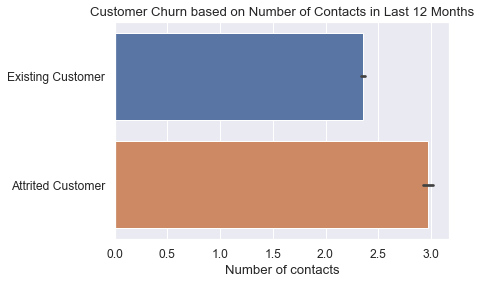

In [55]:
sns.barplot(x='Contacts_Count_12_mon', y= 'Attrition_Flag', data=df)
plt.xlabel('Number of contacts' )
plt.ylabel('')
plt.title('Customer Churn based on Number of Contacts in Last 12 Months')

Text(0.5, 1.0, 'Customer Churn based on Months Inactive in Last 12 Months')

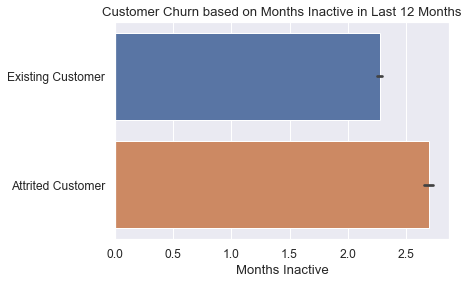

In [56]:
sns.barplot(x='Months_Inactive_12_mon', y= 'Attrition_Flag', data=df)
plt.xlabel('Months Inactive' )
plt.ylabel('')
plt.title('Customer Churn based on Months Inactive in Last 12 Months')

Text(0.5, 1.0, 'Distribution of Customer Age')

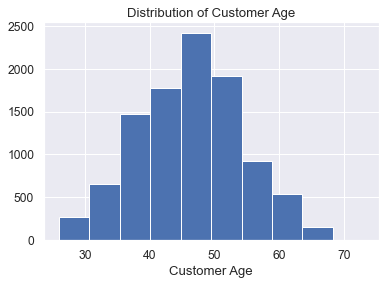

In [57]:
df['Customer_Age'].hist()
plt.xlabel('Customer Age')
plt.title('Distribution of Customer Age')

### There are few outliers, so we will make them into categories before modelling.

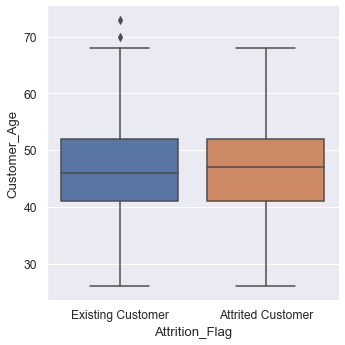

In [58]:
sns.catplot(y = 'Customer_Age', x = 'Attrition_Flag', kind = 'box', data = df);

In [59]:
df_attrited['Customer_Age'].median(), df_existing['Customer_Age'].median()
print('Churned customer Mean Age : ', df_attrited['Customer_Age'].mean())
print('Existing customer Mean Age : ', df_existing['Customer_Age'].mean())

Churned customer Mean Age :  46.659496004917024
Existing customer Mean Age :  46.26211764705882


The median age of attrited customer is slight higher than existing customer.

Hypothesis:
    Is the avg age of people who have churned is equal to avg age of people who have not churned.

In [60]:
from scipy.stats import ttest_ind
ttest_ind(df_attrited['Customer_Age'], df_existing['Customer_Age'])

Ttest_indResult(statistic=1.8319590211710879, pvalue=0.06698688501759036)

Since p-value is less than 0.5, we can conclude that there is no significant association of average age between customers who churned and not churned.

#### Categorical features <a class="anchor" id="categoricalfeatures"></a>

In [61]:
df_gender = pd.crosstab(df['Gender'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2).reset_index()
df_gender.columns = ['Gender', 'PercentAttrited', 'PercentExisting']
df_gender['diff'] = df_gender['PercentExisting'] - df_gender['PercentAttrited']
df_gender.set_index ('Gender')

,PercentAttrited,PercentExisting,diff
Gender,,,
F,57.16,52.09,-5.07
M,42.84,47.91,5.07


In [62]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Customer Chrun based on Gender')

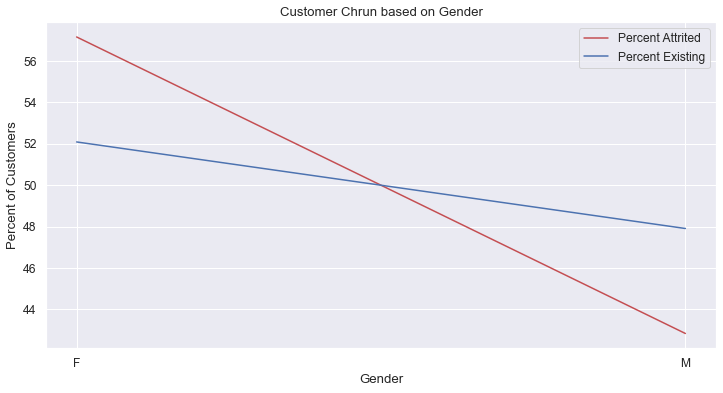

In [63]:
plt.figure(figsize=(12,6))
plt.plot(df_gender['Gender'], df_gender['PercentAttrited'], color='r', label='Percent Attrited')
plt.plot(df_gender['Gender'], df_gender['PercentExisting'], color='b', label='Percent Existing')
plt.legend(loc='upper right')
plt.xlabel('Gender')
plt.ylabel('Percent of Customers')
plt.title('Customer Chrun based on Gender')

#### Though there are more female customers than male with the bank, there is a slight increase in female customers who are churned than male customers.

Education Level

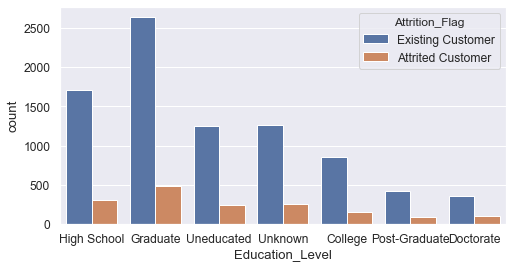

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df)
plt.show()

In [65]:
df_edu = pd.crosstab(df['Education_Level'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2).reset_index()
df_edu.columns = ['Education', '% Attrited Customer','%Existing Customer']
df_edu

,Education,% Attrited Customer,%Existing Customer
0,College,9.47,10.11
1,Doctorate,5.84,4.19
2,Graduate,29.93,31.07
3,High School,18.81,20.08
4,Post-Graduate,5.65,4.99
5,Uneducated,14.57,14.71
6,Unknown,15.73,14.86


#####  There is no specific relation between education and customer retaining. 

Marital Status

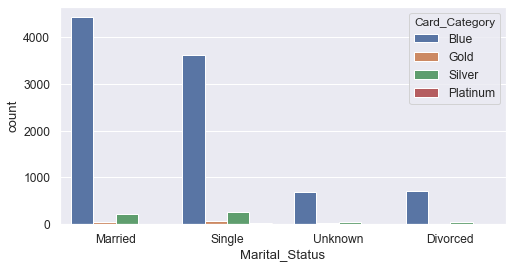

In [66]:
plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status', hue='Card_Category', data=df)
plt.show()

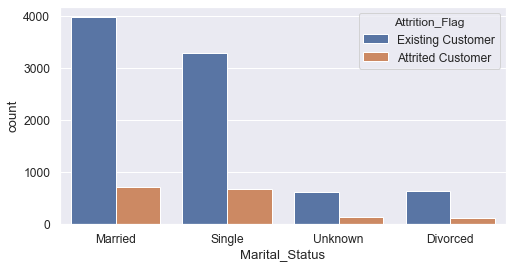

In [67]:
plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=df)
plt.show()

#### There seems to be more differenece between existing and attrited customer in married categrory, we will check this with percentage comparison

Text(0.5, 1.0, 'Percent Churn by Marital Status')

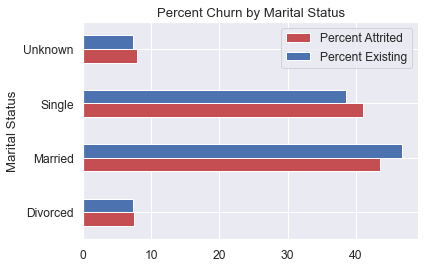

In [68]:
df_ma = pd.crosstab(df['Marital_Status'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2).reset_index()
df_ma.columns = ['Marital Status', 'Percent Attrited', 'Percent Existing']
df_ma.plot(kind='barh', x='Marital Status', color = ['r', 'b'])
plt.title('Percent Churn by Marital Status')

##### Higher percentage of married customers tend to stay longer than Single customers.

Income Category

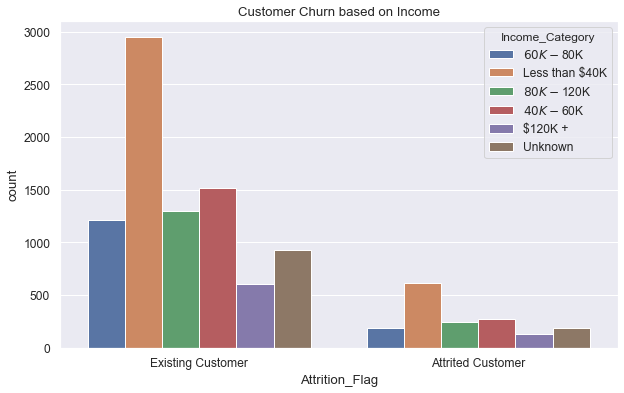

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Income_Category', data=df)
plt.title('Customer Churn based on Income')
plt.show()

There are more customers in 'Less than $40K salary range' 

Text(0.5, 1.0, 'Distribution of Income')

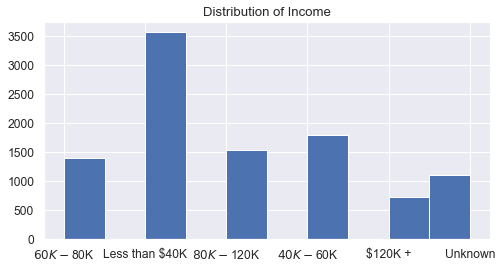

In [70]:
plt.figure(figsize=(8,4))
df['Income_Category'].hist()
plt.title('Distribution of Income')

In [71]:
df_income = pd.crosstab(df['Income_Category'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2).reset_index()
df_income.columns = ['IncomeCategory', 'PercentAttrited', 'PercentExisting']
df_income['diff'] = df_income['PercentExisting'] - df_income['PercentAttrited']
df_income.set_index ('IncomeCategory')

,PercentAttrited,PercentExisting,diff
IncomeCategory,,,
$120K +,7.74,7.07,-0.67
$40K - $60K,16.66,17.87,1.21
$60K - $80K,11.62,14.27,2.65
$80K - $120K,14.87,15.21,0.34
Less than $40K,37.62,34.69,-2.93
Unknown,11.49,10.88,-0.61


Text(0.5, 1.0, 'Customer Chrun based on Income')

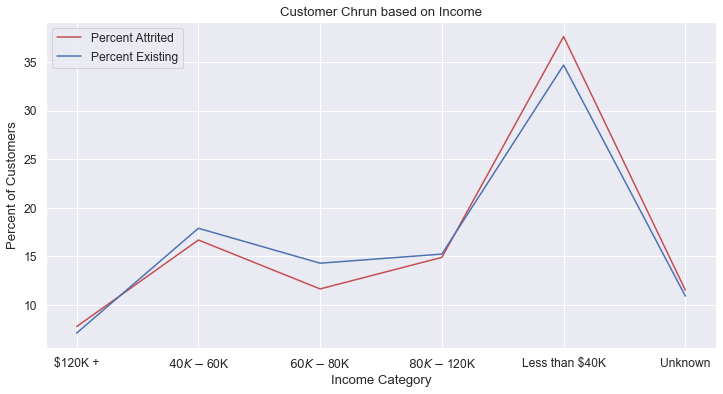

In [72]:
plt.figure(figsize=(12,6))
plt.plot(df_income['IncomeCategory'], df_income['PercentAttrited'], color='r', label='Percent Attrited')
plt.plot(df_income['IncomeCategory'], df_income['PercentExisting'], color='b', label='Percent Existing')
plt.legend(loc='upper left')
plt.xlabel('Income Category')
plt.ylabel('Percent of Customers')
plt.title('Customer Chrun based on Income')

#####  Customers who earn $40K to $80K tend to retain with the bank.

Card Category

In [80]:
def plot_percentchurn(category_name, title, label_name):
    df_subset = pd.crosstab(df[category_name], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2).reset_index()
    df_subset.columns = [label_name, 'PercentAttrited', 'PercentExisting']
    df_subset['diff'] = df_subset['PercentAttrited'] - df_subset['PercentExisting']
    df_subset.set_index (label_name)

    plt.figure(figsize=(6,4))
    plt.plot(df_subset[label_name], df_subset['PercentAttrited'], color='r', label='Percent Attrited')
    plt.plot(df_subset[label_name], df_subset['PercentExisting'], color='b', label='Percent Existing')
    plt.legend(loc='upper left')
    plt.xlabel(label_name)
    plt.ylabel('Percent of Customers')
    plt.title(title)

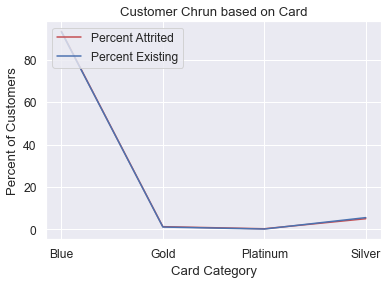

In [82]:
plot_percentchurn('Card_Category', 'Customer Chrun based on Card', 'Card Category')

Text(0.5, 1.0, 'Customer Chrun based on Card')

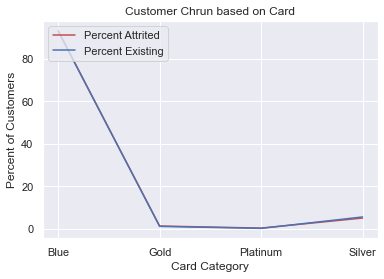

In [210]:
df_inactive = pd.crosstab(df['Card_Category'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2).reset_index()
df_inactive.columns = ['CardCategory', 'PercentAttrited', 'PercentExisting']
df_inactive['diff'] = df_inactive['PercentAttrited'] - df_inactive['PercentExisting']
df_inactive.set_index ('CardCategory')

plt.figure(figsize=(6,4))
plt.plot(df_inactive['CardCategory'], df_inactive['PercentAttrited'], color='r', label='Percent Attrited')
plt.plot(df_inactive['CardCategory'], df_inactive['PercentExisting'], color='b', label='Percent Existing')
plt.legend(loc='upper left')
plt.xlabel('Card Category')
plt.ylabel('Percent of Customers')
plt.title('Customer Chrun based on Card')


Text(0.5, 1.0, 'Average Open to Buy per Card Category')

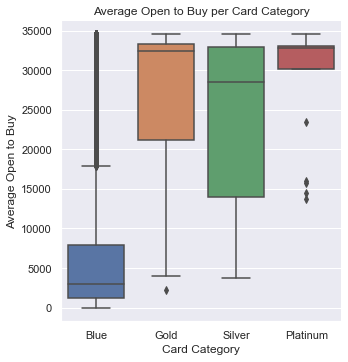

In [246]:
# Card Category vs Average Open to Buy
sns.catplot(x = 'Card_Category', y = 'Avg_Open_To_Buy', kind = 'box', data = df)
plt.xlabel('Card Category')
plt.ylabel('Average Open to Buy')
plt.title('Average Open to Buy per Card Category')

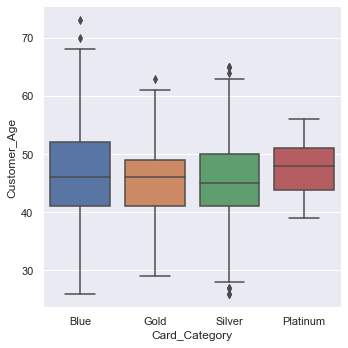

In [161]:
# credit limit vs income
sns.catplot(x = 'Card_Category', y = 'Customer_Age', kind = 'box', data = df);

### Platinum card holders are slightly aged higher

Total Relationship Count

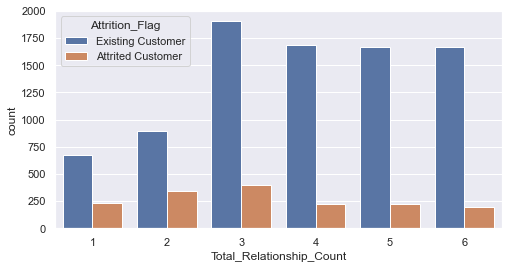

In [172]:
plt.figure(figsize=(8,4))
sns.countplot(x='Total_Relationship_Count', hue='Attrition_Flag', data=df)
plt.show()

#####  Customers with atleast  3 cards with the bank are in larger number which is a good sign for marketing.

Dependent Count

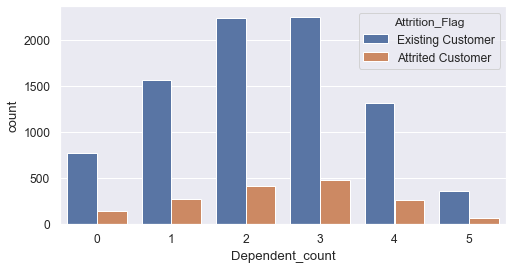

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=df)
plt.show()

In [21]:
# Saving this data for preprocessing
df.to_csv('data\EDABankChurners.csv', index=False)